In [1]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.stats as stats
import numpy as np

In [2]:
#基礎的線性內插法
def intersectx(x1, y1, x2, y2, targety):
    return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)

def intersecty(x1, y1, x2, y2, targetx):
    return y1 + (y2 - y1)/ (x2 - x1) * (targetx - x1)

In [3]:
class LHCPmeasure:
    def __init__(self, file):
        with open(file, "r") as filename:
            self.cpgain = list(csv.reader(filename))
            self.Dk = []
            self.lhzero = []
            self.lhninety = []
            for j in range(200):
                zero = []
                ninety = []
                self.Dk.append(float(self.cpgain[0][2*j+1].split("Dk='")[1].split("'")[0]))
                for i in range(1, 360):   ##注意:這裡取用的不是全部的序列
                    zero.append(float(self.cpgain[i][2*j+1]))
                    ninety.append(float(self.cpgain[i][2*j+2]))
                self.lhzero.append(zero)
                self.lhninety.append(ninety)
            self.lhzeroLocalMax = []
            for lhzero in self.lhzero:
                former = lhzero[0]
                localMax = dict()
                localls = []
                deg = []
                for i in range(1, len(lhzero)-1):
                    if (former < lhzero[i]) and (lhzero[i] > lhzero[i+1]):
                        localMax[lhzero[i]] = i-180
                        localls.append(lhzero[i])
                        deg.append(i)
                    former = lhzero[i]
                self.lhzeroLocalMax.append((localMax, localls, deg))

            self.lhzeroLocalMin = []
            for lhzero in self.lhzero:
                former = lhzero[0]
                localMin = dict()
                localls = []
                deg = []
                for i in range(1, len(lhzero)-1):
                    if (former > lhzero[i]) and (lhzero[i] < lhzero[i+1]):
                        localMin[lhzero[i]] = i-180
                        localls.append(lhzero[i])
                        deg.append(i)
                    former = lhzero[i]
                self.lhzeroLocalMin.append((localMin, localls, deg))
                  
    def lhzeromainLobe(self):
        allDk = self.lhzeroLocalMax
        out = []
        for i in range(len(allDk)):
            localMax, localls, deg = allDk[i][0], allDk[i][1], allDk[i][2]
            lhzero = self.lhzero[i]
            globalMax = max(localMax.keys())
            k = deg[localls.index(globalMax)]
            m = k
            # 低點
            while lhzero[k] > globalMax-3 :
                k -= 1
            LF = intersectx(k-180, lhzero[k], k-179, lhzero[k+1], globalMax-3)
            # 高點
            while lhzero[m] > globalMax -3 :
                m += 1
            HF = intersectx(m-180, lhzero[m], m-181, lhzero[m-1], globalMax-3)
            BW = HF - LF
            out.append((globalMax, LF, HF, BW))
        return out
    
    def lhzeroLeftSideLobe(self):
        allDk = self.lhzeroLocalMax
        out = []
        for i in range(len(allDk)):
            localMax, localls, deg = allDk[i][0], allDk[i][1], allDk[i][2]
            lhzero = self.lhzero[i]
            globalMax = max(localMax.keys())
            x = deg[localls.index(globalMax)-1]
            y = x 
            #print(localls.index(globalMax)+1)
            while lhzero[y] > localls[localls.index(globalMax)-1]-3 :
                y += 1
            #print(y-180, lhzero[k])
            HF = intersectx(y-180, lhzero[y], y-181, lhzero[y-1], localls[localls.index(globalMax)-1]-3)
          #  print(HF)
            z = x
            while lhzero[z] > localls[localls.index(globalMax)-1]-3 :
                z -= 1
            LF = intersectx(z-180, lhzero[z], z-179, lhzero[z-1], localls[localls.index(globalMax)-1]-3)
          #  print(LF)
            out.append((localls[localls.index(globalMax)-1], LF, HF, HF-LF))
        return out

In [4]:
cplobegain = LHCPmeasure('左手圓極化 Gain Plot 參數前 0.03.csv')

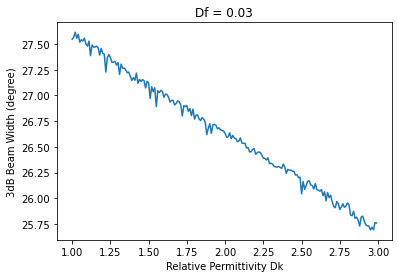

In [5]:
# Main Lobe 3dB Beam Width
B = []
x = cplobegain.lhzeromainLobe()
for i in range(200):
    B.append(x[i][3])

plt.plot(cplobegain.Dk, B)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("3dB Beam Width (degree)")
plt.title('Df = 0.03')
plt.show()

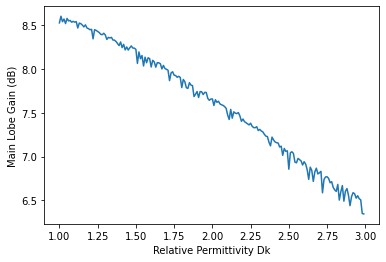

In [6]:
# Main Lobe Gain
Max = []
#x = cplobegain.lhzeromainLobe()
for i in range(200):
    Max.append(x[i][0])
plt.plot(cplobegain.Dk, Max)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Main Lobe Gain (dB)")
plt.show()

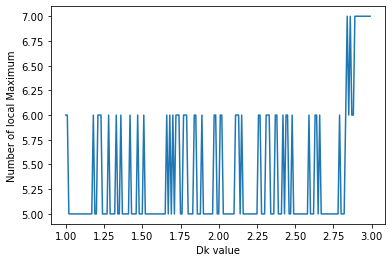

In [7]:
localMaxNum = []
for ele in cplobegain.lhzeroLocalMax:
    localMaxNum.append(len(ele[0]))

plt.plot(cplobegain.Dk, localMaxNum)
plt.xlabel('Dk value')
plt.ylabel('Number of local Maximum')
plt.show()  

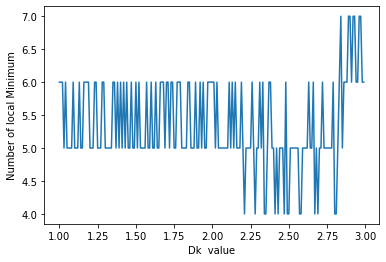

In [8]:
localMinNum = []
for ele in cplobegain.lhzeroLocalMin:
    localMinNum.append(len(ele[0]))

plt.plot(cplobegain.Dk, localMinNum)
plt.xlabel('Dk  value')
plt.ylabel('Number of local Minimum')
plt.show()  

In [9]:
compare = LHCPmeasure('../Datasets/500資料版/右手圓極化 Gain Plot.csv')

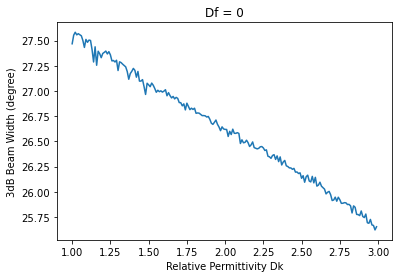

In [10]:
# Main Lobe 3dB Beam Width  #Df = 0.00
C = []
t = compare.lhzeromainLobe()
for i in range(200):
    C.append(t[i][3])

plt.plot(cplobegain.Dk, C)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("3dB Beam Width (degree)")
plt.title('Df = 0')
plt.show()

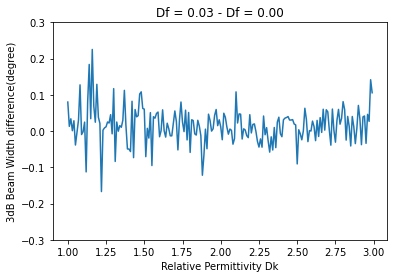

0.0154015125758076


In [11]:
#試試看計算Df = 0 and 0.03中間的差距
D = []
for i in range(200):
    D.append(B[i] - C[i])

plt.plot(cplobegain.Dk, D)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("3dB Beam Width difference(degree)")
plt.title('Df = 0.03 - Df = 0.00')
plt.ylim(-0.3,0.3)
plt.show()

print(sum(D) / len(D))

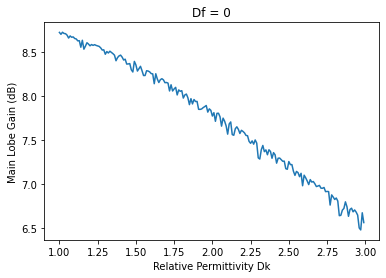

In [12]:
# Main Lobe Gain
Max2 = []
#x = cplobegain.lhzeromainLobe()
for i in range(200):
    Max2.append(t[i][0])
plt.plot(cplobegain.Dk, Max2)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Main Lobe Gain (dB)")
plt.title('Df = 0')
plt.show()

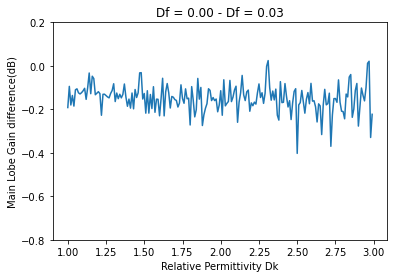

-0.14891372953880144


In [13]:
#試試看計算Df = 0 and 0.03中間的差距
G = []
for i in range(200):
    G.append(Max[i] - Max2[i])

plt.plot(cplobegain.Dk, G)
plt.xlabel("Relative Permittivity Dk")
plt.ylabel("Main Lobe Gain difference(dB)")
plt.title('Df = 0.00 - Df = 0.03')
plt.ylim(-0.8,0.2)
plt.show()

print(sum(G) / len(G))

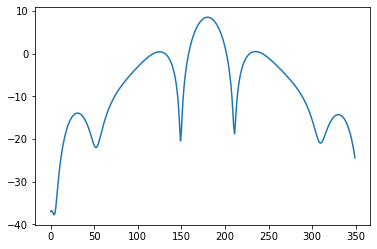

In [14]:
x1 = []
for i in range(350):
    x1.append(cplobegain.lhzero[0][i] )
    
plt.plot(x1)
plt.show()

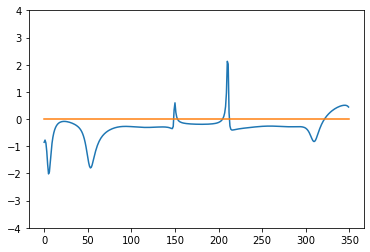

In [28]:
x2 = []
x3 = []
for i in range(350):
    x2.append(cplobegain.lhzero[0][i]-compare.lhzero[0][i] )
    x3.append(0)
plt.plot(x2)
plt.plot(x3)
plt.ylim(-4,4)
plt.show()